In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import pylab as py
import re 
import io
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

# Enem 2019

In [ ]:
#dados do enem 2019 de provas feitas em Minas Gerais
enem = pd.read_csv('mg.csv',';')

In [ ]:
#tamanho total dos dados crus
enem.shape

(538896, 11)

In [ ]:
#conferindo o formato das notas
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']
enem[notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
0,512.6,564.6,626.4,533.4,860.0
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,621.0,654.4,726.8,595.8,800.0


In [ ]:
#limpando os dados tirando todos que tiraram 0 em alguma materia e todos os treineiros
enem = enem.query('NU_NOTA_CN > 0')
enem = enem.query('NU_NOTA_CH > 0')
enem = enem.query('NU_NOTA_MT > 0')
enem = enem.query('NU_NOTA_LC > 0')
enem = enem.query('NU_NOTA_REDACAO > 0')
enem = enem.query('IN_TREINEIRO == 0')
enem.shape

(325462, 11)

In [ ]:
#estatisticas basicas para todas as colunas
enem.describe()

,NU_IDADE,TP_COR_RACA,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,325462.000000,325462.000000,325462.0,325462.000000,325462.000000,325462.000000,325462.000000,325462.000000
mean,21.913357,2.073738,0.0,493.016170,525.455203,534.385909,546.703559,618.385249
std,7.105015,1.002670,0.0,78.068473,80.489613,58.210963,115.678380,167.790178
min,6.000000,0.000000,0.0,327.900000,315.900000,322.300000,359.000000,40.000000
25%,18.000000,1.000000,0.0,431.100000,468.100000,500.700000,451.000000,520.000000
50%,19.000000,2.000000,0.0,489.200000,530.400000,538.400000,530.100000,600.000000
75%,23.000000,3.000000,0.0,551.000000,582.900000,574.400000,629.600000,720.000000
max,83.000000,5.000000,0.0,842.800000,835.100000,770.500000,985.500000,1000.000000


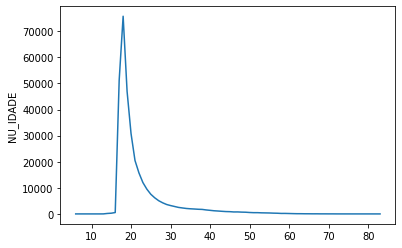

In [ ]:
#Gráfico de idade 
temp = enem['NU_IDADE'].value_counts().sort_index()
sns.lineplot(data=temp)

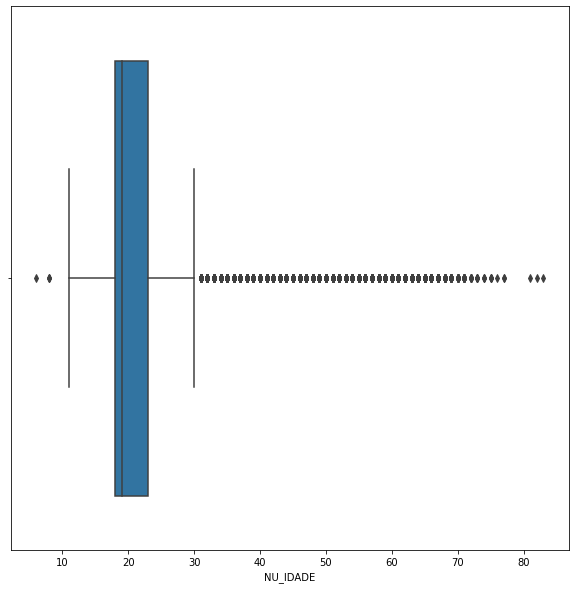

In [ ]:
#Boxplot de idade
plt.figure(figsize=(10,10))
sns.boxplot(x='NU_IDADE', data= enem)

In [ ]:
#Total de idade em ordem de recorrencia 
enem['NU_IDADE'].value_counts()

18    75729
17    51221
19    46954
20    30784
21    20476
      ...  
83        1
82        1
76        1
81        1
6         1
Name: NU_IDADE, Length: 72, dtype: int64

In [ ]:
#criação da coluna nota total
enem['NU_NOTA_TOTAL'] = enem[notas].sum(axis=1)/5
notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO', 'NU_NOTA_TOTAL']
enem[notas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,512.6,564.6,626.4,533.4,860.0,619.40
4,621.0,654.4,726.8,595.8,800.0,679.60
6,469.8,575.4,412.3,525.8,600.0,516.66
7,353.0,507.3,610.6,536.2,740.0,549.42
9,505.2,566.5,579.2,572.5,560.0,556.68


Text(0, 0.5, 'Nota Total')

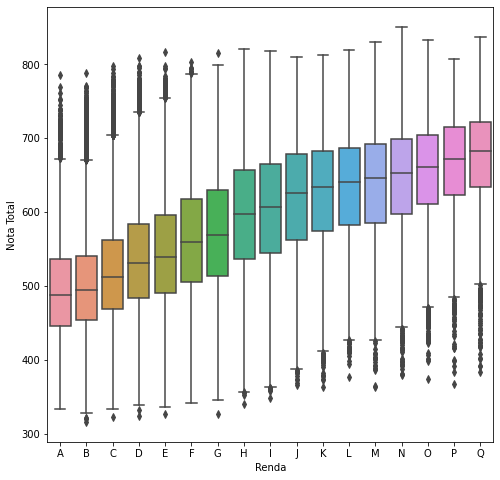

In [ ]:
#ordenando os registros pelo Q006 (criterio de renda) e mostrando como boxplot
rendaOrdenada = enem['Q006'].unique()
rendaOrdenada.sort()
plt.figure(figsize=(8,8))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data= enem, order= rendaOrdenada)
plt.xlabel('Renda')
plt.ylabel('Nota Total')

(0.0, 1000.0)

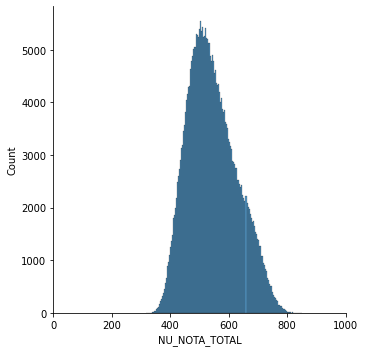

In [ ]:
#distribuição dos dados totais
sns.displot(enem["NU_NOTA_TOTAL"])
plt.xlim(0,1000)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


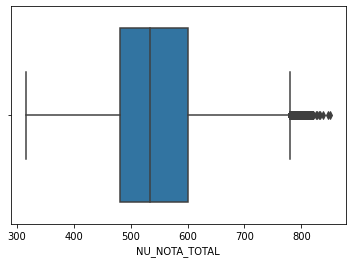

In [ ]:
#boxplot das notas totais
sns.boxplot(enem['NU_NOTA_TOTAL'])

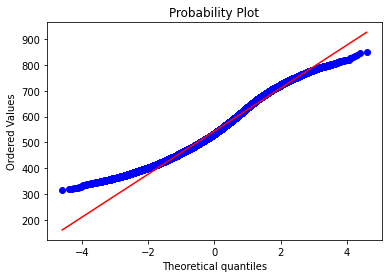

In [ ]:
#conferindo a normalidade da nota total 
fig, ax = plt.subplots()
stats.probplot(enem['NU_NOTA_TOTAL'], fit=True,   plot=ax)
plt.show()

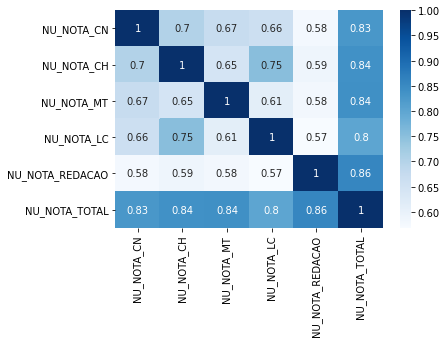

In [ ]:
#correlção das notas por materia 
correlacao = enem[notas].corr()
sns.heatmap(correlacao, cmap="Blues", annot=True )

In [ ]:
#ordenação de registros por cidade
#Tem registro de todas as cidades de MG
enem['NO_MUNICIPIO_RESIDENCIA'].value_counts()

Belo Horizonte      48144
Uberlândia          12581
Contagem            11268
Montes Claros       11088
Juiz de Fora        10033
                    ...  
Consolação             16
Comendador Gomes       16
Claraval               14
Serra da Saudade        7
Água Comprida           7
Name: NO_MUNICIPIO_RESIDENCIA, Length: 853, dtype: int64

In [ ]:
#limpeza e tratamento de dados
notaTotal = enem
notaTotal = notaTotal.drop(['NU_IDADE'], axis=1)
notaTotal = notaTotal.drop(['TP_SEXO'], axis=1)
notaTotal = notaTotal.drop(['TP_COR_RACA'], axis=1)
notaTotal = notaTotal.drop(['IN_TREINEIRO'], axis=1)
notaTotal = notaTotal.drop(['Q006'], axis=1)
notaTotal[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_TOTAL']] = notaTotal[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_TOTAL']].apply(pd.to_numeric)
notaTotal

,NO_MUNICIPIO_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,Uberlândia,512.6,564.6,533.4,626.4,860.0,619.40
4,São João da Ponte,621.0,654.4,595.8,726.8,800.0,679.60
6,Três Corações,469.8,575.4,525.8,412.3,600.0,516.66
7,Betim,353.0,507.3,536.2,610.6,740.0,549.42
9,Três Corações,505.2,566.5,572.5,579.2,560.0,556.68
...,...,...,...,...,...,...,...
538890,Ibirité,363.4,527.8,547.0,516.9,740.0,539.02
538891,Uberaba,453.6,446.2,446.9,467.9,260.0,414.92
538892,São João do Paraíso,527.6,534.4,543.3,537.9,600.0,548.64
538893,Capinópolis,473.7,380.7,499.6,369.3,560.0,456.66


In [ ]:
#agrupamento das notas, criando a media de todas as notas por cidade
notaTotal = notaTotal.groupby(['NO_MUNICIPIO_RESIDENCIA']).mean()
notaTotal

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NO_MUNICIPIO_RESIDENCIA,,,,,,
Abadia dos Dourados,479.656471,515.357647,519.867059,517.181176,641.882353,534.788941
Abaeté,497.430000,523.403226,533.764194,558.362903,623.419355,547.275935
Abre Campo,477.200000,511.754651,525.492442,555.522093,598.720930,533.738023
Acaiaca,452.878723,492.970213,506.112766,478.734043,514.042553,488.947660
Aguanil,473.150000,511.328000,514.112000,555.744000,586.000000,528.066800
...,...,...,...,...,...,...
Wenceslau Braz,497.261111,546.172222,534.616667,558.225000,642.222222,555.699444
Água Boa,483.762500,512.082813,510.157813,550.082813,602.500000,531.717187
Água Comprida,493.671429,509.628571,526.857143,547.900000,577.142857,531.040000


# IFDM MG 2016

In [ ]:
#dados do IFDM 2016 de Minas Gerais
ifdm = pd.read_csv('IFDM2016.csv',';')
ifdm.dropna
ifdm.shape

(853, 6)

In [ ]:
#A escala de IFDM vai de 0 a 1, multipliquei por 1000 para conseguir manipular mais facilmente 
ifdm['IFDM'] = ifdm['IFDM'].astype(float)
ifdm['IFDM'] = ifdm['IFDM']*1000
ifdm['Emprego & Renda'] = ifdm['Emprego & Renda'].astype(float)
ifdm['Emprego & Renda'] = ifdm['Emprego & Renda']*1000
ifdm['Educação'] = ifdm['Educação'].astype(float)
ifdm['Educação'] = ifdm['Educação']*1000
ifdm['Saúde'] = ifdm['Saúde'].astype(float)
ifdm['Saúde'] = ifdm['Saúde']*1000

In [ ]:
#estatisticas basicas dos dados por coluna
ifdm.describe()

,Ranking Educação,IFDM,Emprego & Renda,Educação,Saúde
count,853.000000,842.000000,842.000000,853.000000,853.000000
mean,427.000000,677.761164,447.089311,813.414068,772.605979
std,246.384185,67.543406,110.401436,52.915089,109.147216
min,1.000000,456.800000,190.600000,602.500000,356.900000
25%,214.000000,634.525000,364.325000,778.100000,707.300000
50%,427.000000,678.100000,442.200000,816.000000,793.500000
75%,640.000000,721.725000,515.275000,852.400000,853.500000
max,853.000000,858.600000,795.500000,979.900000,972.300000


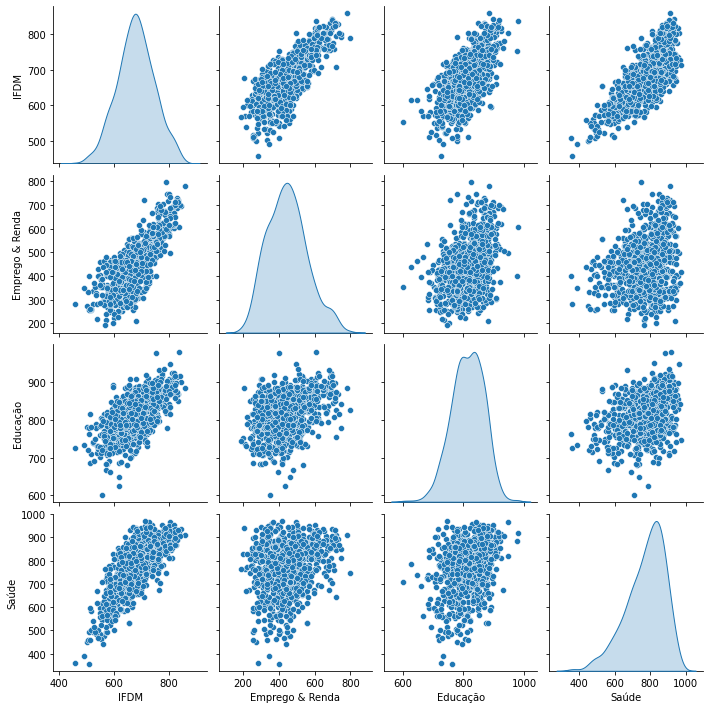

In [ ]:
#Gráficos de distribuição de todas as variaveis por todas
ifdmLimpo = ifdm
ifdmLimpo = ifdmLimpo.drop(['Ranking Educação'],axis =1)
ifdmLimpo = ifdmLimpo.drop(['Município'],axis =1)
sns.pairplot(ifdmLimpo, diag_kind='kde', height=2.5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


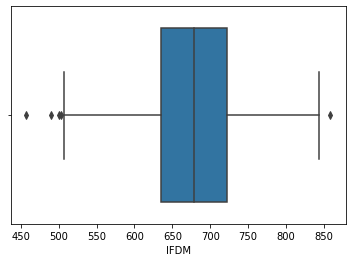

In [ ]:
#boxplot do IFDM Geral
sns.boxplot(ifdm['IFDM'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


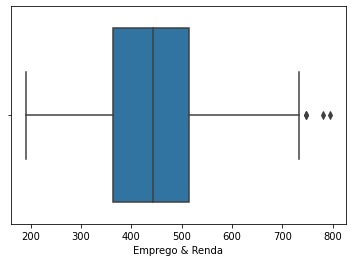

In [ ]:
#boxplot do IFDM Emprego e Renda
sns.boxplot(ifdm['Emprego & Renda'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


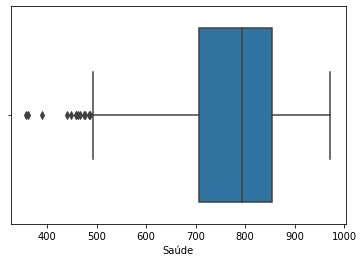

In [ ]:
#boxplot do IFDM Saúde
sns.boxplot(ifdm['Saúde'])

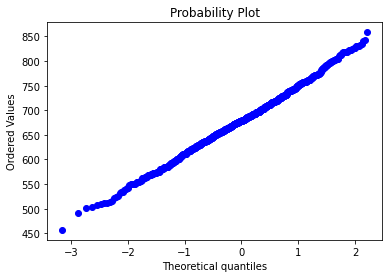

In [ ]:
#conferindo a normalidade do IFDM geral
fig, ax = plt.subplots()
stats.probplot(ifdm['IFDM'], fit=True,   plot=ax)
plt.show()

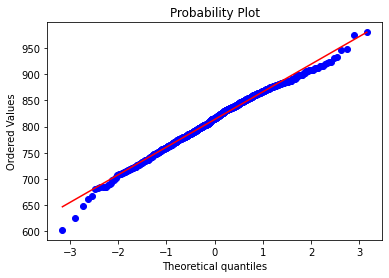

In [ ]:
#conferindo a normalidade do IFDM Educação
fig, ax = plt.subplots()
stats.probplot(ifdm['Educação'], fit=True,   plot=ax)
plt.show()

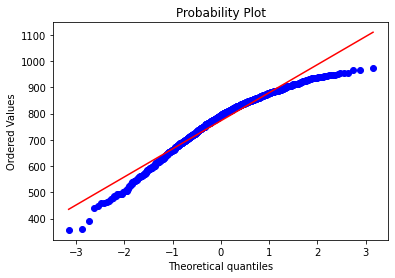

In [ ]:
#conferindo a normalidade do IFDM Saúde
fig, ax = plt.subplots()
stats.probplot(ifdm['Saúde'], fit=True,   plot=ax)
plt.show()

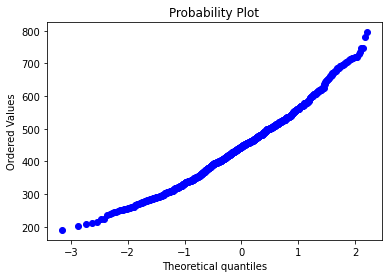

In [ ]:
#conferindo a normalidade do IFDM Emprego e Renda
fig, ax = plt.subplots()
stats.probplot(ifdm['Emprego & Renda'], fit=True,   plot=ax)
plt.show()

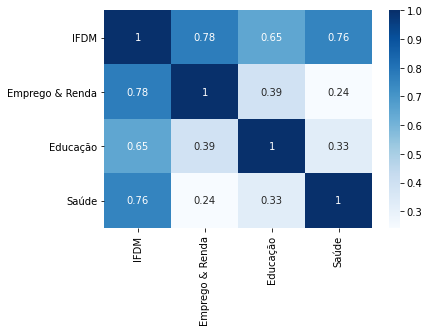

In [ ]:
#Mapa de calor da correlação das catergorias do IFDM
criterios = ['IFDM','Emprego & Renda',	'Educação',	'Saúde']
correlacao = ifdm[criterios].corr()
sns.heatmap(correlacao, cmap="Blues", annot=True )




# IDEB 2019

In [ ]:
#lendo os dados do IDEB MG e multiplicando por 10 para manter a escola 0 a 1000
ideb = pd.read_excel('IDEB2019.xlsx')
ideb['Total'] = ideb['Total']*10
ideb

,Nome do Município,Total,Indicador de Rendimento (P)
0,Abadia dos Dourados,901.0,0.911927
1,Abaeté,718.0,0.724026
2,Abre Campo,859.0,0.873401
3,Acaiaca,840.0,0.832811
4,Açucena,898.0,0.900216
...,...,...,...
847,Virginópolis,696.0,0.699141
848,Virgolândia,954.0,0.955305
849,Visconde do Rio Branco,735.0,0.735865
850,Volta Grande,819.0,0.825635


In [ ]:
#estatisticas basicas dos dados do ideb
ideb.describe()

,Total,Indicador de Rendimento (P)
count,852.000000,852.000000
mean,855.003521,0.857546
std,75.347319,0.074218
min,534.000000,0.524296
25%,814.000000,0.818601
50%,864.000000,0.866306
75%,909.250000,0.908687
max,1000.000000,1.000000


In [ ]:
#correlação dos dois valores do IDEB
ideb.corr()


,Total,Indicador de Rendimento (P)
Total,1.000000,0.981411
Indicador de Rendimento (P),0.981411,1.000000


In [ ]:
#retirando o indicador de rendimento por ser severamente proximo do indicador total
ideb = ideb.drop(['Indicador de Rendimento (P)'], axis = 1)

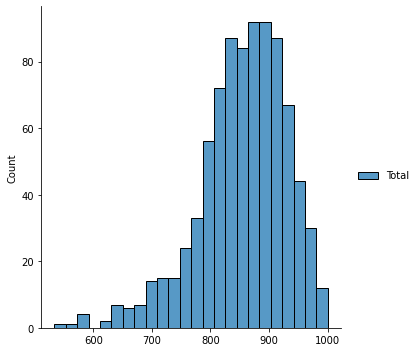

In [ ]:
#distribuição de notas do IDEB
sns.displot(ideb)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


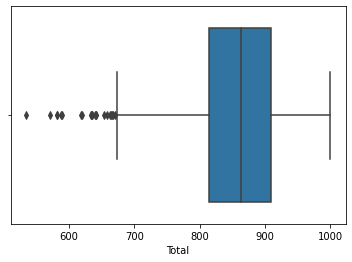

In [ ]:
#boxplot de notas do IDEB
sns.boxplot(ideb['Total'])

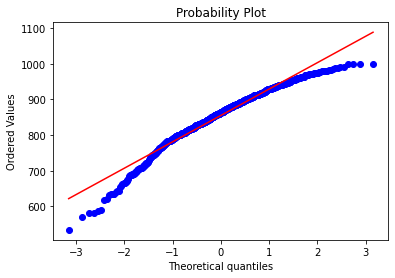

In [ ]:
#conferindo a normalidade dos dados do IDEB
fig, ax = plt.subplots()
stats.probplot(ideb['Total'], fit=True,   plot=ax)
plt.show()

# GINI 2000 e 2010

In [ ]:
# Índice de Gini da renda domiciliar per capita segundo Município - Minas Gerais
gini = pd.read_excel('ginimg.xlsx')
gini

,Município Gini,Gini 2000,Gini 2010
0,Abadia dos Dourados,0.5110,0.4738
1,Abaeté,0.5862,0.5510
2,Abre Campo,0.5160,0.5225
3,Acaiaca,0.5547,0.4821
4,Açucena,0.5569,0.4955
...,...,...,...
848,Virginópolis,0.5701,0.4983
849,Virgolândia,0.5977,0.5019
850,Visisconde do Rio Branco,0.5555,0.4941
851,Volta Grande,0.5758,0.5230


In [ ]:
gini.describe()

,Gini 2000,Gini 2010
count,853.000000,853.000000
mean,0.547122,0.481198
std,0.063682,0.053684
min,0.354100,0.328800
25%,0.504100,0.444200
50%,0.546400,0.479600
75%,0.587300,0.514100
max,0.750100,0.783200


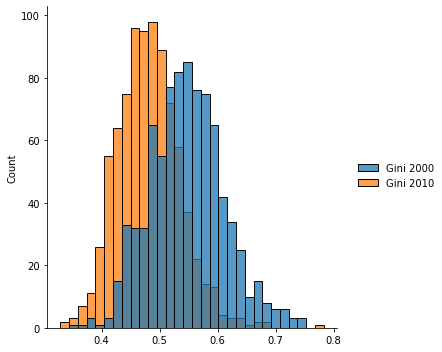

In [ ]:
sns.displot(gini)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


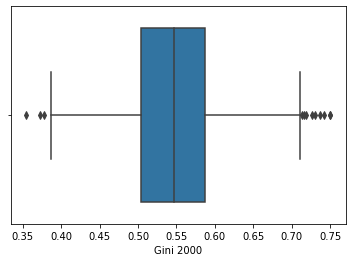

In [ ]:
sns.boxplot(gini['Gini 2000'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


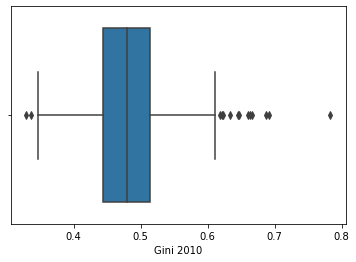

In [ ]:
sns.boxplot(gini['Gini 2010'])

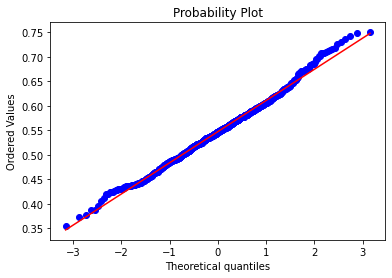

In [ ]:
fig, ax = plt.subplots()
stats.probplot(gini['Gini 2000'], fit=True,   plot=ax)
plt.show()

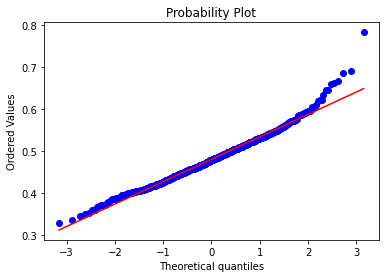

In [ ]:
fig, ax = plt.subplots()
stats.probplot(gini['Gini 2010'], fit=True,   plot=ax)
plt.show()

In [ ]:
#temp = gini['Município']
#temp = temp.to_string()
#temp = re.sub('[0-9]', '', temp)
#temp = pd.read_fwf(io.StringIO(temp), header=None)
#temp.to_excel('ginimg.xlsx')

# Correlação

In [ ]:
#leitura do compilado de todos os dados anteriores (exceto IDEB por ter relação nula com todas as outras variáveis)
cor = pd.read_excel('compilado.xlsx')
cor

,Municipio,Gini2000,Gini2010,Nota,IFDM,Emprego,Educação,Saude
0,Abadia dos Dourados,0.5110,0.4738,534.788941,0.7088,0.4993,0.8360,0.7911
1,Abaeté,0.5862,0.5510,547.275935,0.6552,0.4913,0.8461,0.6282
2,Abre Campo,0.5160,0.5225,533.738023,0.6414,0.4367,0.7922,0.6953
3,Acaiaca,0.5547,0.4821,488.947660,0.6811,0.3457,0.8313,0.8662
4,Açucena,0.5569,0.4955,515.603944,0.6744,0.4072,0.7121,0.9038
...,...,...,...,...,...,...,...,...
848,Virginópolis,0.5701,0.4983,548.276106,0.6176,0.3768,0.7948,0.6814
849,Virgolândia,0.5977,0.5019,509.596923,0.6813,0.3371,0.7802,0.9264
850,Visisconde do Rio Branco,0.5555,0.4941,558.753975,0.7410,0.6084,0.8545,0.7601
851,Volta Grande,0.5758,0.5230,528.737838,0.6789,0.4499,0.7862,0.8006


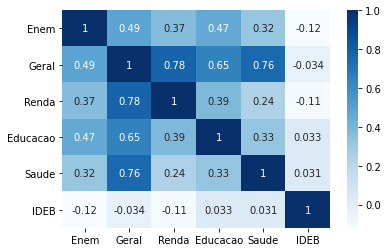

In [ ]:
#mapa de calor de todas as variaveis
sns.heatmap(cor.corr(), cmap="Blues", annot=True )

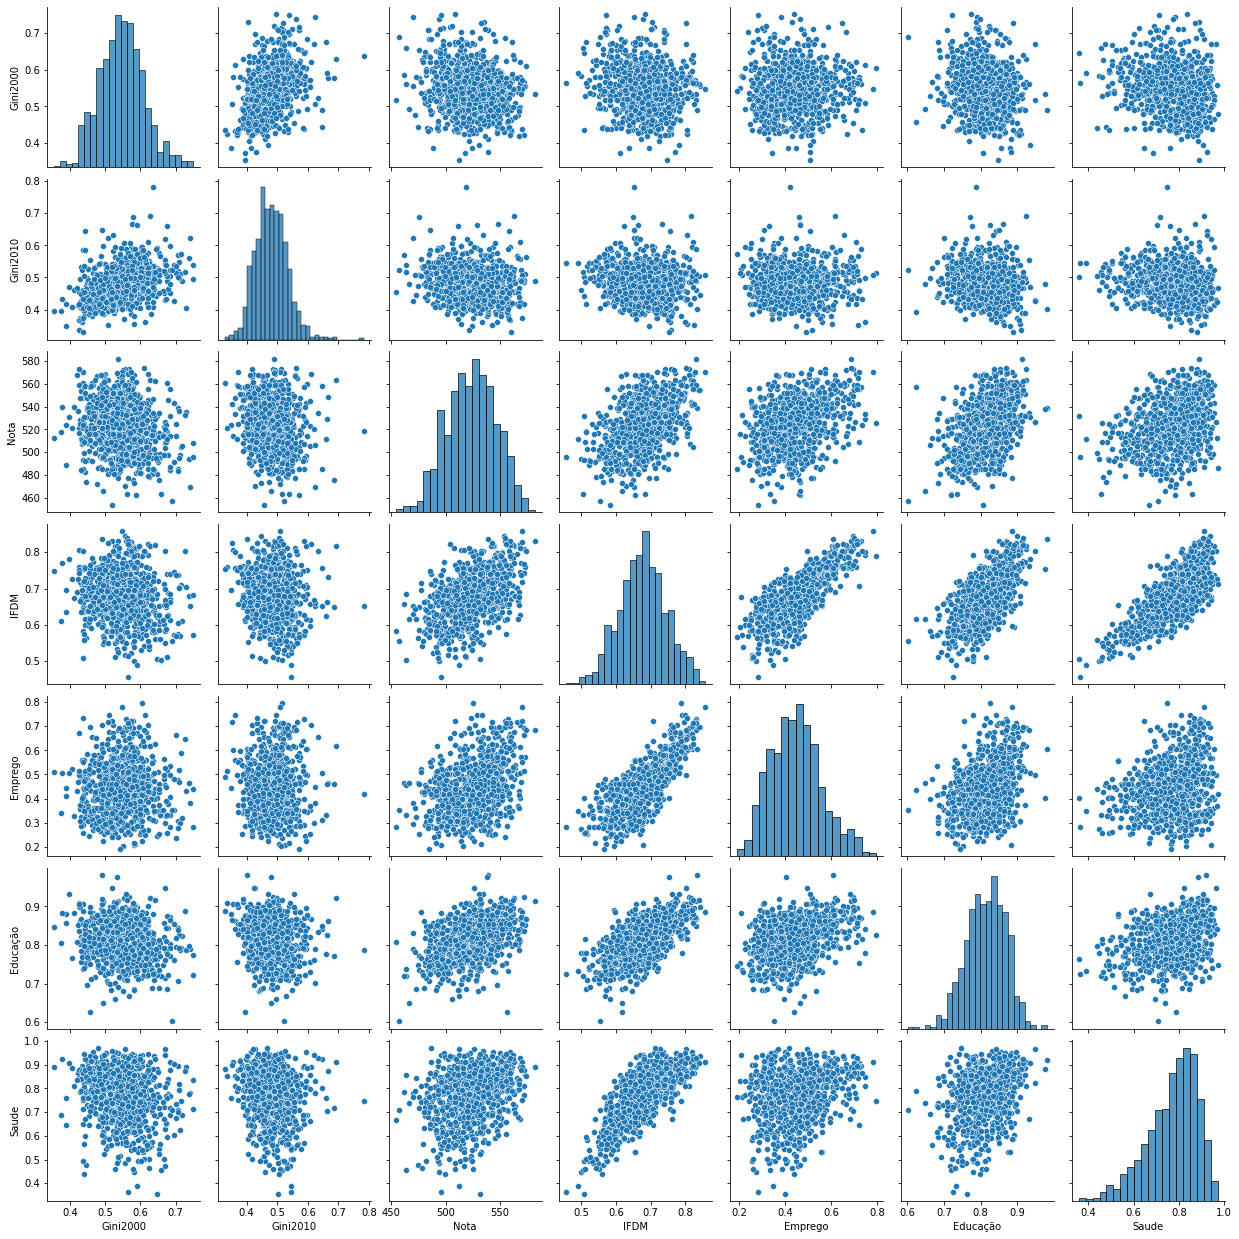

In [ ]:
#distribuição de todas as variaveis por todas
sns.pairplot(cor)

# Regressão Linear


In [ ]:
cor = cor.dropna()
cor

,Gini2000,Gini2010,Nota,IFDM,Emprego,Educação,Saude
Municipio,,,,,,,
Abadia dos Dourados,0.5110,0.4738,534.788941,0.7088,0.4993,0.8360,0.7911
Abaeté,0.5862,0.5510,547.275935,0.6552,0.4913,0.8461,0.6282
Abre Campo,0.5160,0.5225,533.738023,0.6414,0.4367,0.7922,0.6953
Acaiaca,0.5547,0.4821,488.947660,0.6811,0.3457,0.8313,0.8662
Açucena,0.5569,0.4955,515.603944,0.6744,0.4072,0.7121,0.9038
...,...,...,...,...,...,...,...
Virginópolis,0.5701,0.4983,548.276106,0.6176,0.3768,0.7948,0.6814
Virgolândia,0.5977,0.5019,509.596923,0.6813,0.3371,0.7802,0.9264
Visisconde do Rio Branco,0.5555,0.4941,558.753975,0.7410,0.6084,0.8545,0.7601


In [ ]:
#regressão linear para prever a nota do Enem utilizando do IFDM Geral
x = cor.iloc[:, 2].values
x = x.reshape(-1, 1)
y = cor.iloc[:, 3].values
modelo = LinearRegression()
modelo.fit(x,y)
modelo.score(x,y)

0.24925392414441894

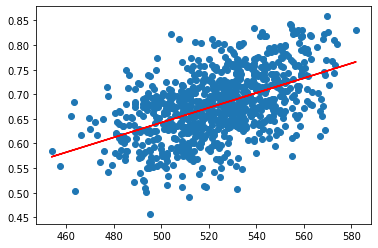

In [ ]:
previsoes = modelo.predict(x)
plt.scatter(x, y)
plt.plot(x, previsoes, color = 'red')

In [ ]:
# modedelo 2 prevendo a nota do enem utilizando das outras variveis exceto o IFDM Geral
modeloAjustado = sm.ols(formula= 'Nota ~ Gini2000 + Gini2010 + Emprego +	Educação + Saude', data = cor)
modeloTreinado = modeloAjustado.fit()
modeloTreinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Nota   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     70.11
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           2.84e-61
Time:                        04:48:29   Log-Likelihood:                -3664.2
No. Observations:                 842   AIC:                             7340.
Df Residuals:                     836   BIC:                             7369.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    394.8267     13.745     28.725      0.000     367.847     421.806
Gini2000     -26.8881     11.318     -2.376      0.018     -49.104      -4.672
Gini2010     -19.4472     13.246     -1.468      0.142     -45.447       6.552
Emprego       42.8715      6.471      6.625      0.000      30.169      55.574
Educação     135.3903     13.997      9.673      0.000     107.917     162.863
Saude         30.3546      6.441      4.713      0.000      17.713      42.996
==============================================================================
Omnibus:                        3.438   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                3.501
Skew:                          -0.142   Prob(JB):                        0.174
Kurtosis:                       2.861   Cond. No.                         50.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""